In [23]:
# Empirical examination of how we might more (computationally) efficiently model constant diffusion over time. 
# The heat kernel can be used to calculate the concentration some distance from source sime time after a 
# single secretion event. 
# Under constant secretion, we could repeatedly calculate the heat kernel for all dt whilst the secretion was taking
# place, but this is computationally very inefficient. 
# Rather, if the secreting agent is stationary, are the sum of these heat kernels (Gaussians) in fact also a gaussian?
#
#
# Mark N. Read, 2018
import matplotlib.pyplot as plt
import numpy as np

In [24]:
def heat_kernel(dist, dt, diffusion):
    """
    dist = distances in um
    dt = time since secretion event, in seconds
    diffusion = in um^2/s
    quantity_secreted = number of molecules
    """
    dimensionality = 3
    coeff = 1 / ( (4 * np.pi * diffusion * dt) ** (dimensionality/2) )  
    diff = np.exp(-(dist*dist) / (4 * diffusion * dt))
    return coeff * diff

In [35]:
max_time = 5.0  # Minutes
max_distance = 100  # Microns
secretion_rate = 40e3  # Molecules/min

samples = 100
distances = np.linspace(-max_distance, max_distance, samples)  # Microns
samples = 5
times = np.linspace(max_time/samples, max_time, samples)  # Minutes. How long since secretion event
timeslice = times[1] - times[0]
print(times)

secretion_rate = 1.
quantity_secreted = secretion_rate * timeslice  # Both expressed in minutes; quantity in molecules.
diffusion_coeff = 2.5e2

cs = []  # If times in reverse order, results of oldest secretion come first. 
for dt in times:
    c = quantity_secreted * heat_kernel(distances, dt, diffusion_coeff)
    cs.append(c)
        

[1. 2. 3. 4. 5.]


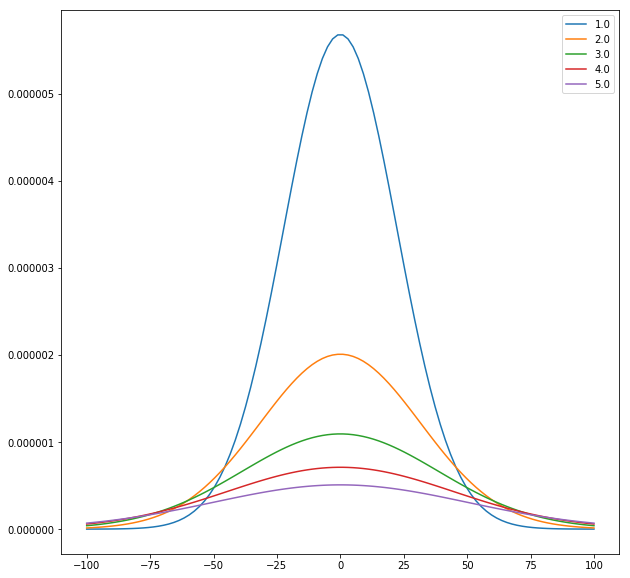

In [36]:
# Show how SINGLE secretion event's diffusion evolves over time (dt)
# IE

fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
for distro in cs:
    ax.plot(distances, distro)
ax.legend(times)
plt.show()

[1.79789813e-07 2.00324574e-07 2.22997014e-07 2.48010200e-07
 2.75586193e-07 3.05968420e-07 3.39424539e-07 3.76249843e-07
 4.16771317e-07 4.61352380e-07 5.10398380e-07 5.64362814e-07
 6.23754219e-07 6.89143574e-07 7.61171969e-07 8.40558140e-07
 9.28105339e-07 1.02470685e-06 1.13134930e-06 1.24911268e-06
 1.37916605e-06 1.52275758e-06 1.68119776e-06 1.85583455e-06
 2.04801954e-06 2.25906440e-06 2.49018740e-06 2.74245032e-06
 3.01668685e-06 3.31342422e-06 3.63280072e-06 3.97448266e-06
 4.33758477e-06 4.72059915e-06 5.12133758e-06 5.53689266e-06
 5.96362265e-06 6.39716420e-06 6.83247632e-06 7.26391727e-06
 7.68535453e-06 8.09030603e-06 8.47210863e-06 8.82410839e-06
 9.13986479e-06 9.41336025e-06 9.63920511e-06 9.81282806e-06
 9.93064230e-06 9.99017867e-06 9.99017867e-06 9.93064230e-06
 9.81282806e-06 9.63920511e-06 9.41336025e-06 9.13986479e-06
 8.82410839e-06 8.47210863e-06 8.09030603e-06 7.68535453e-06
 7.26391727e-06 6.83247632e-06 6.39716420e-06 5.96362265e-06
 5.53689266e-06 5.121337

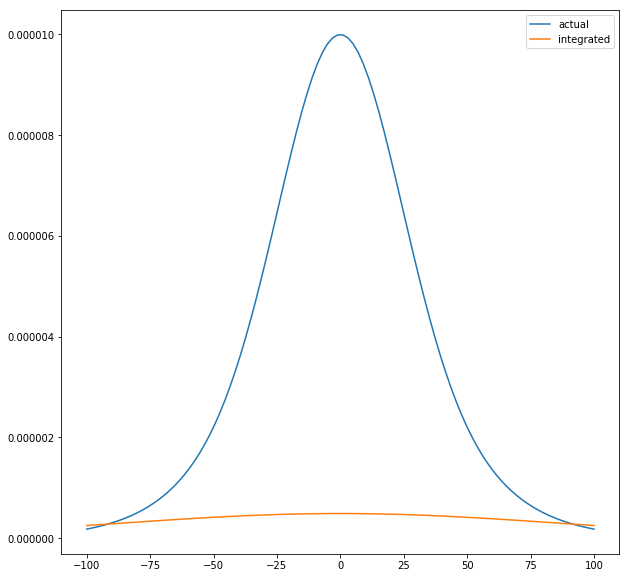

In [37]:
concentration = np.zeros(shape=cs[0].shape)
for i in list(range(len(cs))):
    concentration += cs[i]
       

print(concentration)

dt = np.sum(times)
secreted = quantity_secreted * len(times)
concentration_integrated = secreted * heat_kernel(distances, dt, diffusion_coeff)

print(concentration_integrated)

fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.plot(distances, concentration)
ax.plot(distances, concentration_integrated)
ax.legend(['actual', 'integrated'])
plt.show()

[0, 1, 2, 3, 4]
